In [0]:
import os
all_path=[]
for dirs,subdir,files in os.walk(os.getcwd()):
  for file in files:
    file_path= os.path.join(dirs,file)
    all_path.append(file_path)
    print(file_path)

In [0]:
!mkdir -p ~/.kaggle

from google.colab import files
uploads = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mv kaggle.json ~/.kaggle

In [0]:
cd ..

/


In [0]:
cd ~/.kaggle

/root/.kaggle


In [0]:
!cp "/content/drive/My Drive/celeba-dataset.zip" ~/.kaggle

!unzip celeba-dataset.zip

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sklearn as sk
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [0]:
!ls

partition = pd.read_csv("list_eval_partition.csv")
landmarks = pd.read_csv("list_landmarks_align_celeba.csv")
bbox = pd.read_csv("list_bbox_celeba.csv")
attr = pd.read_csv("list_attr_celeba.csv")

celeba-dataset.zip  list_attr_celeba.csv     list_landmarks_align_celeba.csv
img_align_celeba    list_bbox_celeba.csv
kaggle.json	    list_eval_partition.csv


In [0]:
partition["partition"].value_counts().sort_index()

0    162770
1     19867
2     19962
Name: partition, dtype: int64

In [0]:
partition.set_index("image_id",inplace = True)

In [0]:
partition.head()

,partition
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0


In [0]:
#replacing -1 value with 0 and setting image_id column as index

attr.replace(to_replace=-1,value=0,inplace = True)
attr.set_index('image_id', inplace=True)
attr.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
par_attr = partition.join(attr['Male'], how='inner')
par_attr.head()

,partition,Male
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,1
000004.jpg,0,0
000005.jpg,0,0


In [0]:
for i,j in enumerate(attr.columns):
  print(i,j)


0 5_o_Clock_Shadow
1 Arched_Eyebrows
2 Attractive
3 Bags_Under_Eyes
4 Bald
5 Bangs
6 Big_Lips
7 Big_Nose
8 Black_Hair
9 Blond_Hair
10 Blurry
11 Brown_Hair
12 Bushy_Eyebrows
13 Chubby
14 Double_Chin
15 Eyeglasses
16 Goatee
17 Gray_Hair
18 Heavy_Makeup
19 High_Cheekbones
20 Male
21 Mouth_Slightly_Open
22 Mustache
23 Narrow_Eyes
24 No_Beard
25 Oval_Face
26 Pale_Skin
27 Pointy_Nose
28 Receding_Hairline
29 Rosy_Cheeks
30 Sideburns
31 Smiling
32 Straight_Hair
33 Wavy_Hair
34 Wearing_Earrings
35 Wearing_Hat
36 Wearing_Lipstick
37 Wearing_Necklace
38 Wearing_Necktie
39 Young


(178, 218)


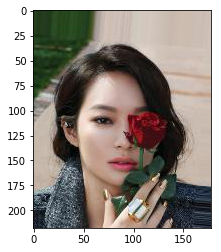

In [0]:
image_folder='img_align_celeba/img_align_celeba/'
example_pic = image_folder + '000507.jpg'

#use keras's load_img for visualizing images
img= load_img(example_pic)
plt.imshow(img)
print(img.size)

In [0]:
attr.loc[example_pic.split('/')[-1]][["Smiling"]] 

Smiling    0
Name: 000507.jpg, dtype: int64

In [0]:
new_partition=par_attr
new_partition["Male"].value_counts()
new_partition.head()

,partition,Male
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,1
000004.jpg,0,0
000005.jpg,0,0


In [0]:
TRAINING_SAMPLES = 20000
#VALIDATION_SAMPLES = 16000
#TEST_SAMPLES = 20000

#Preparing our data
The new dataset contanis 20k train, and 3k each for validation and test datasets


In [0]:
new_partition_train=new_partition.iloc[:TRAINING_SAMPLES,:]
new_partition_valid=new_partition.iloc[162771:172771,:]
new_partition_test =new_partition.iloc[182638:(192599+1),:]

print(new_partition_train["partition"].value_counts())
print(new_partition_valid["partition"].value_counts())
print(new_partition_test["partition"].value_counts())

0    20000
Name: partition, dtype: int64
2    9962
Name: partition, dtype: int64
1    10000
Name: partition, dtype: int64


![flow_from_directory](https://miro.medium.com/max/757/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg)

*The directory structure required to use the flow_from_directory*

image_source :[Medium post](https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

# **Creating the required directory structure**


The current structure
```
celeba-dataset.zip  list_attr_celeba.csv     list_landmarks_align_celeba.csv
img_align_celeba    list_bbox_celeba.csv
kaggle.json	    list_eval_partition.csv
```



In [0]:
!rm -r train test validation

In [0]:
#new_partition_train
#new_partition_test
#new_partition_valid
import shutil

sets = ["train","validation","test"]
classes= ["Female","Male"]
#source=os.getcwd()

'''there are 3 new datasets,that are numpy dataframes
that we pass as arguments for creating a folder and moving that particular
image data into that folder'''

def creatingfolder(dataframes):
  dataset_folder_name = sets[dataframes["partition"].unique()[0]]
  #os.path.sep = '/'
  
  if not os.path.exists(os.path.sep + dataset_folder_name):
    os.mkdir(dataset_folder_name)
    
  if  dataset_folder_name!= "test":
    for i in classes:
      if not os.path.exists(os.path.sep + dataset_folder_name + os.path.sep + i):
        os.mkdir(dataset_folder_name + os.path.sep + i )
        #npsc=new_partition_set_class
      npsc=dataframes.loc[dataframes["Male"]==(classes.index(i))]
      for j in npsc.index:
        shutil.copy("img_align_celeba/img_align_celeba/{}".format(j),dataset_folder_name + os.path.sep + i + os.path.sep)
        
  else:
    os.mkdir(dataset_folder_name+os.path.sep+'test_folder')
    for j in dataframes.index:
      shutil.copy("img_align_celeba/img_align_celeba/{}".format(j),dataset_folder_name + os.path.sep + "test_folder" + os.path.sep)

  
    
    

      

In [0]:
creatingfolder(new_partition_train)
creatingfolder(new_partition_valid)
creatingfolder(new_partition_test)

In [0]:
list(new_partition_train['partition'].values)
np.unique(list(new_partition['partition'].values))

array([0, 1, 2])

After creating folders


```
celeba-dataset.zip    list_bbox_celeba.csv	       train
img_align_celeba      list_eval_partition.csv	       validation
kaggle.json	      list_landmarks_align_celeba.csv
list_attr_celeba.csv  test
```



#*Data Augmentation*

In [0]:
#first lets try without data augmentation

train_datagens =  ImageDataGenerator(
  preprocessing_function=preprocess_input,
  rescale= 1./255,  
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

test_datagens = ImageDataGenerator()

train_generator = train_datagens.flow_from_directory(
    
     'train',
     target_size=(218,178),
     batch_size=64,
     class_mode='categorical')

validation_generator = test_datagens.flow_from_directory(
     'validation',
     target_size=(218,178),
     batch_size=64,
     class_mode='categorical')



Found 20000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


TypeError: ignored

*Now we're done preparing the data for our model*

##*Now we build our custom model*

In [0]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.preprocessing import image
import tensorflow as tf
from keras.optimizers import SGD
import keras.callbacks
from keras.applications.mobilenet import MobileNet
from keras.layers import MaxPooling2D

**INCEPTION V3 model**

![INCEPTIO_V3](https://i.imgur.com/kdXUzu1.png)
source:[https://hackathonprojects.files.wordpress.com/2016/09/74911-image03.png](https://hackathonprojects.files.wordpress.com/2016/09/74911-image03.png)

In [0]:
'''This is where transfer learning comes into play, notice the include_top = "False",this removes the 
fully connected layer'''
base_model_x =InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(218,178,3))

x=base_model_x.output
x= Dropout(0.2)(x)
x= MaxPooling2D()(x)
x= GlobalAveragePooling2D()(x)
#x= Dense(1024, activation="relu")(x)
x= Dense(512, activation="relu")(x)
x= Dense(128,activation= "relu")(x)
x= Dense(32,activation= "relu")(x)
x= Dense(8,activation= "relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [0]:
img = load_img(example_pic)
y = img_to_array(img)/255.
y = y.reshape((1,) + y.shape)

# plot 10 augmented images of the loaded iamge
plt.figure(figsize=(20,10))
plt.suptitle('Data Augmentation', fontsize=28)

i = 0
for batch in train_datagens.flow(y, batch_size=1):
    plt.subplot(3, 5, i+1)
    #plt.grid(False)
    plt.imshow(batch.reshape(218, 178, 3))
    
    if i == 9:
        break
    i += 1
    
plt.show()


In [0]:
model_x= Model(inputs=base_model_x.input, outputs=predictions)


for i,layer in enumerate(model_x.layers):
  print(i,layer.name)

 


In [0]:
'''freezing  layers from our 351 layer model
here we freeze the weights of thes layers and only train remaining layers to fit our dataset.'''
for layer in model_x.layers[:53]:
    layer.trainable = False

In [0]:
model_x.summary()

In [0]:
# compile the model
model_x.compile(optimizer=SGD(lr=0.01)
                    , loss='categorical_crossentropy'
                    , metrics=['accuracy'])


**WITHOUT DATA AUGMENTATION i.e when ImageDataGenerator parameters are set to zero/False**


In [0]:

'''model.fit_generator(        
train_generator,       
steps_per_epoch=train_generator.n//train_generator.batch_size,       
epochs=20,        
validation_data=validation_generator,        
validation_steps=validation_generator.n//validation_generator.batch_size)  '''      


'model.fit_generator(        \ntrain_generator,       \nsteps_per_epoch=train_generator.n//train_generator.batch_size,       \nepochs=20,        \nvalidation_data=validation_generator,        \nvalidation_steps=validation_generator.n//validation_generator.batch_size)  '

**Now , with DATA AUGMENTATION** 

    Let's check how the results turn out.
    
    Also, this time we'll use callbacks to stop training when the prediction reaches desired level.

In [0]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(((logs.get('loss')<0.04)and(logs.get('val_loss')<0.07))or((logs.get('acc')>0.98)and(logs.get('val_acc')>0.97))):
      print("satisfactory")
      self.model.stop_training=True

In [0]:
call = myCallback()
hist= model_x.fit_generator(        
    train_generator,       
    steps_per_epoch=train_generator.n//train_generator.batch_size,       
    epochs=10,        
    validation_data=validation_generator,        
    validation_steps=validation_generator.n//validation_generator.batch_size,
    callbacks=[call])

In [0]:
model_x.save("model_x1.h5")

In [0]:
!ls

celeba-dataset.zip    list_bbox_celeba.csv	       test
img_align_celeba      list_eval_partition.csv	       train
kaggle.json	      list_landmarks_align_celeba.csv  validation
list_attr_celeba.csv  model_x.h5


# Overfitting



The model was initially overfitting
    
    assumptions:
        * enormous number of features that our model is learning
        * small training-set

    So,
        * I increased the number of examples in training set
        * freezed all pre-trained layers in the model 


changed model to mobilenet, since it has less parameters to train, this one's overfitting too.





**One eternity later:**

   *Figured it out. Added a few dense layers to the model 
   Dense(128), Dense(32) and reduced the dropout.*
        
       
      

    




In [0]:
!cp "model_x1.h5"  /content/sample_data

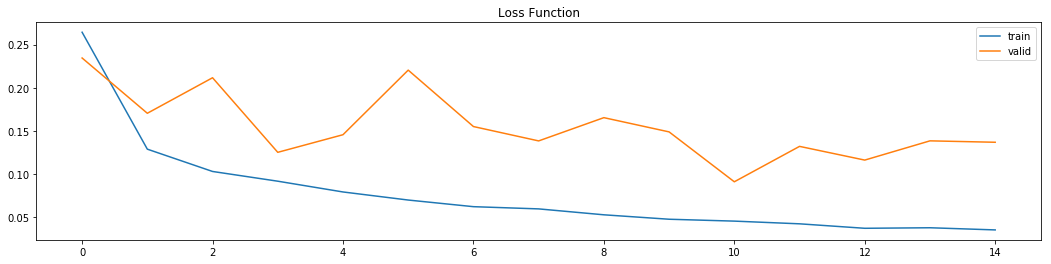

In [0]:
plt.figure(figsize=(18, 4))
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()

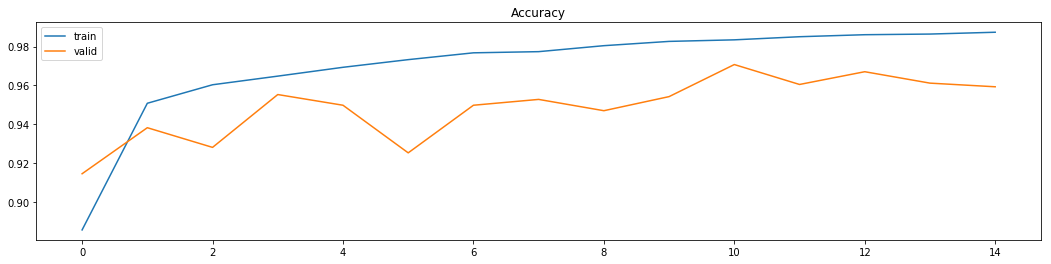

In [0]:
plt.figure(figsize=(18, 4))
plt.plot(hist.history['acc'], label = 'train')
plt.plot(hist.history['val_acc'], label = 'valid')
plt.legend()
plt.title('Accuracy')
plt.show()

In [0]:
!ls

sample_data


In [0]:
test_generator = test_datagens.flow_from_directory(
    directory="test",
    target_size=(218,178),
    #color_mode="rgb",
    batch_size=1,
    class_mode=None,
    #shuffle=False,
    #seed=42
)

Found 19961 images belonging to 1 classes.


In [0]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model_x.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

19961/19961 [==============================] - 774s 39ms/step


In [0]:
np.sum(np.array(predicted_class_indices)==labels)

10656

In [0]:
predicted_class_indices=np.argmax(pred,axis=1)
labels=new_partition_test["Male"].tolist()
accuracy=100 * np.sum(np.array(predicted_class_indices)==labels) / len(predicted_class_indices)
print("test accuracy" ,end=' ')
print(accuracy)

test accuracy 53.153649616752666


# **References/sources:**


1.Kaggle Kernels:
          

   *  Marcos Alvarado:[Image Recognition-Gender Detection-Inceptionv3](https://www.kaggle.com/bmarcos/image-recognition-gender-detection-inceptionv3#Dataset)


2.Keras Documentation:


   *  [InceptionV3](https://keras.io/applications/#inceptionv3)


3.Blogs:


   *  [TransferLearning](https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e)
        
   * [flow_from_directory()](https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)


4.Stack Exchange:


   *  [stackexchange/flow_from_directory](https://datascience.stackexchange.com/questions/28499/how-to-use-flow-from-directory-in-keras-for-csv)
          











